**IMPORTING THE REQUIRED LIBRARIES**

In [1]:
import pandas as pd


In [2]:
from google.colab import files
uploaded = files.upload()

Saving train_revised.csv to train_revised (1).csv


In [3]:
data = pd.read_csv("train_revised.csv")

In [4]:
data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


**Q1.Find the top 7 most travelled routes for a Sunday on average, indicate the average of
each and rank them in decreasing order**

In [5]:
data['travel_date'] = pd.to_datetime(data['travel_date'])
data['travel_date']

0       2017-10-17
1       2017-11-19
2       2017-11-26
3       2017-11-27
4       2017-11-27
           ...    
51640   2018-04-20
51641   2018-04-20
51642   2018-04-20
51643   2018-04-20
51644   2017-11-14
Name: travel_date, Length: 51645, dtype: datetime64[ns]

In [6]:
data['day'] = data['travel_date'].dt.day_name()
data.head()


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,Tuesday
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,Monday
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,Monday


In [7]:
df2 = data.query('day=="Sunday"')
df2

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,Sunday
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,Sunday
111,5856,9,Cash,MDF1ULUMPX,2018-04-15,5:20,Kisii,Nairobi,shuttle,11,Sunday
112,5857,6,Cash,MDF1ULG1GR,2018-04-15,5:00,Kisii,Nairobi,shuttle,11,Sunday
113,5857,3,Cash,MDF6ULD8NQ,2018-04-15,5:00,Kisii,Nairobi,shuttle,11,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
49784,13534,8A,Mpesa,DDLUTQQJ2C,2018-04-15,19:07,Sirare,Nairobi,Bus,49,Sunday
49785,13534,7A,Mpesa,GVJSWN57XJ,2018-04-15,19:07,Sirare,Nairobi,Bus,49,Sunday
49786,13535,15A,Mpesa,MI27JEXM0L,2018-04-15,8:00,Awendo,Nairobi,Bus,49,Sunday
49787,13541,2B,Mpesa,ICOT1CSM7F,2018-04-15,7:13,Kehancha,Nairobi,Bus,49,Sunday


In [8]:
#The number of travellers that travelled from these routes on a given sunday
dest_group = df2.groupby(['travel_from'])['travel_from'].count().sort_values(ascending=False)
dest_group

travel_from
Kisii        2756
Migori        973
Homa Bay      910
Sirare        629
Rongo         538
Kehancha      301
Awendo        296
Kijauri       115
Nyachenge      85
Mbita          83
Rodi           63
Ndhiwa         45
Keroka         41
Sori            9
Keumbu          3
Name: travel_from, dtype: int64

In [9]:
top_routes=dest_group.head(7)
top_routes

#These are the routes that we will focus on to do the average 

travel_from
Kisii       2756
Migori       973
Homa Bay     910
Sirare       629
Rongo        538
Kehancha     301
Awendo       296
Name: travel_from, dtype: int64

In [10]:

#For Kisii


df_kisii= df2.query('travel_from =="Kisii"') #filter out travelers who travelled to Kisii
kisii_travellers = len(df_kisii) #find number 
kisii_sundays = len(pd.unique(df_kisii['travel_date']))  
kisii_average = kisii_travellers/kisii_sundays
print("The average for Kisii:", kisii_average)

#For Migori
df_migori= df2.query('travel_from =="Migori"')
migori_travellers = len(df_migori)
migori_sundays = len(pd.unique(df_migori['travel_date']))
migori_average = migori_travellers/migori_sundays
print("The average for Migori :", migori_average)

#For Homa Bay
df_homa= df2.query('travel_from =="Homa Bay"')
homa_travellers = len(df_homa)
homa_sundays = len(pd.unique(df_homa['travel_date']))
homa_average = homa_travellers/homa_sundays
print("The average for Homa:", homa_average)

#For Sirare
df_sirare= df2.query('travel_from =="Sirare"')
sirare_travellers = len(df_sirare)
sirare_sundays = len(pd.unique(df_sirare['travel_date']))
sirare_average = sirare_travellers/sirare_sundays
print("The average for Sirare :", sirare_average)

#For Rongo
df_rongo= df2.query('travel_from =="Rongo"')
rongo_travellers = len(df_rongo)
rongo_sundays = len(pd.unique(df_rongo['travel_date']))
rongo_average = rongo_travellers/rongo_sundays
print("The average for Rongo :", rongo_average)

#For Kehancha
df_kehancha= df2.query('travel_from =="Kehancha"')
kehancha_travellers = len(df_kehancha)
kehancha_sundays = len(pd.unique(df_kehancha['travel_date']))
kehancha_average = kehancha_travellers/kehancha_sundays
print("The average for Kehancha :", kehancha_average)

#For Awendo
df_awendo= df2.query('travel_from =="Awendo"')
awendo_travellers = len(df_awendo)
awendo_sundays = len(pd.unique(df_awendo['travel_date']))
awendo_average = awendo_travellers/awendo_sundays
print("The average for Awendo is  :", awendo_average)


The average for Kisii: 125.27272727272727
The average for Migori : 48.65
The average for Homa: 47.89473684210526
The average for Sirare : 41.93333333333333
The average for Rongo : 24.454545454545453
The average for Kehancha : 21.5
The average for Awendo is  : 22.76923076923077


In [11]:
route_averages = {
    'Route Name':['Kisii','Migori','Homa','Sirare','Rongo','Kehancha', 'Awendo'],
    'Route Average':[kisii_average,migori_average,homa_average,sirare_average,rongo_average,kehancha_average,awendo_average]
   }
route_averages = pd.DataFrame(route_averages,columns=['Route Name','Route Average'])
print(route_averages)

  Route Name  Route Average
0      Kisii     125.272727
1     Migori      48.650000
2       Homa      47.894737
3     Sirare      41.933333
4      Rongo      24.454545
5   Kehancha      21.500000
6     Awendo      22.769231


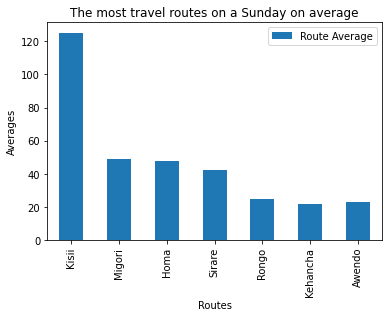

In [12]:
route_averages.iloc[0:7].plot(kind='bar',x='Route Name',y='Route Average',xlabel='Routes',ylabel='Averages',title='The most travel routes on a Sunday on average')

**Q2.What is the probability that a passenger travelling from Kijauri will take a Shuttle if
they depart before 07:30?**

In [13]:
kijauri_route = data.query('travel_from=="Kijauri"')
len(kijauri_route)
kijauri_route

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day
1625,6560,1A,Mpesa,XY20JTZHY4,2017-04-12,7:07,Kijauri,Nairobi,Bus,49,Wednesday
1658,6568,9,Mpesa,EJXHRAFPCQ,2017-04-12,7:00,Kijauri,Nairobi,shuttle,11,Wednesday
1663,6560,21B,Mpesa,QVBJ6ZAT75,2017-04-12,7:07,Kijauri,Nairobi,Bus,49,Wednesday
1685,6570,20B,Mpesa,0KBEL0BJDK,2017-04-12,7:06,Kijauri,Nairobi,Bus,49,Wednesday
1700,6568,10,Mpesa,IFXMNKI8NO,2017-04-12,7:00,Kijauri,Nairobi,shuttle,11,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
51074,13755,2,Mpesa,IXUDNPSSZ0,2018-04-19,10:52,Kijauri,Nairobi,shuttle,11,Thursday
51156,13769,5,Mpesa,PU4LHLHZVC,2018-04-19,6:20,Kijauri,Nairobi,shuttle,11,Thursday
51446,13800,1A,Mpesa,7H5OTXKINU,2018-04-20,7:06,Kijauri,Nairobi,Bus,49,Friday
51468,13804,5,Mpesa,D8LAUAHLFB,2018-04-20,7:50,Kijauri,Nairobi,shuttle,11,Friday


In [14]:
kijauri_route_before_7_30=kijauri_route.query('travel_time<"7:30" and car_type=="shuttle"')
len(kijauri_route_before_7_30)

487

In [15]:
probability=((len(kijauri_route_before_7_30))/(len(kijauri_route)))
probability

0.472356935014549

**Q3.The Sequence ‘MK’ appears in a payment reference. Based on the distribution of
characters in all the payment references what do you think is the most probable next
character (if any)?**

In [16]:
count = 0
receipt_with_mk = []
for k in data['payment_receipt']:
    resu = 'MK' in k
    if resu==True:
        receipt_with_mk.append(k)
        count+=1
receipt_with_mk

['TBJMRMKQLJ',
 'LYMKG9DII7',
 '7BMTKUMKJZ',
 'OMKHFVAGHD',
 'VUA7IXPMKP',
 'MKWNS24S9N',
 'PBPQWRMK3D',
 'U4E3MKPFL3',
 'DMKAARIPUX',
 'VOXSQ8OMKY',
 'WHS1NZMKQV',
 'VP4IVMK9S9',
 'ZJNMI9MKYF',
 'MKNF2KD0U2',
 'EJ6BTPEHMK',
 'UCMKDTBA9F',
 'MK1VCQJUUU',
 'PMK79CLMAA',
 'RMK65BW48J',
 'NIKOEYJMKO',
 'FDU9SMKGK1',
 'PYNMKXBHIJ',
 'NDPMKLM9BG',
 'ERQUWMK1BR',
 'MDMKTXUUWJ',
 'PHMKZNKFRO',
 '88MK4L2NE7',
 'YMKFVDLSLD',
 'HMKHQEROZV',
 'EATQMK9INK',
 'MKZOPZOJWF',
 'JVRJXMKUO2',
 'QWVFTGSMKD',
 'KMKMSFGZAH',
 'DOKM7JMKM1',
 'GBCGMKFWDU',
 'NLMKBO8KBZ',
 'RW5MKYRRJO',
 'ELDMKHZJAS',
 'ALDMWMKBRK',
 'CIUGFMK3OJ',
 'C0VJIMKHE5',
 'B6SGUDHMK6',
 'AWUSAFJMKI',
 'ZJAFPXMKMK',
 'GJMK8X8VOB',
 'Y6CREMRMKM',
 'APYPOOMMKI',
 'PIOEZAXWMK',
 'SVA4MKKMZD',
 'PSRAWVMKCM',
 'MKZFPF9OQL',
 'WPHNU98MK9',
 '0XQZMKCWSR',
 '0KULGYMKZC',
 'AOON9GMKFI',
 '4OCS2GRNMK',
 'CIJJOMKBIR',
 'OMKXAKHKYG',
 'ELJFWIMK0I',
 '5MKG7KRNPP',
 'EE71GMK1BY',
 'UYXMKYGVSS',
 'UIJSPI3MK2',
 'MK1XTRHG57',
 '9AYMKFEF9S',
 'XNHCXRSM

In [17]:
characters=[]

for a in receipt_with_mk:
    position = a.find('MK')
    if position<8:
        characters.append(a[position+2])
    else:
        characters.append('No character proceeds here')

In [22]:
chars_after_MK = pd.DataFrame(characters,columns=['count'])

In [23]:
chars_after_MK['count'].value_counts()

No character proceeds here    52
L                             20
Y                             20
H                             19
R                             19
P                             18
M                             18
T                             18
C                             17
G                             16
I                             16
K                             15
B                             15
E                             14
A                             14
S                             12
Z                             12
Q                             12
X                             12
J                             12
W                             12
D                             11
2                             11
V                             11
U                             11
N                             10
F                             10
1                              9
O                              8
9                              8
0         